In [13]:
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")

In [14]:
from scipy.ndimage import convolve
import numpy as np
from matplotlib import pyplot as plt

from src.uilc import PositionArray, Radiation

In [15]:
s= 5
H = 0.1
W= 0.02

In [16]:
k = 21
n = 2*k if k%2 ==0 else 2*k-1 
d = lambda i, j, n: (n/2-i)**2 + (n/2-j)**2
dw = W/n

In [17]:
filter =np.fromfunction(lambda i, j: Radiation.lambertian(s, h, (dw**2)*d(i, j, n), inv=True), (n,n), dtype=float)
distribution = np.where(np.random.rand(*(k, k)) >= 0.9, 1, 0)
intensity = convolve(distribution, filter, mode='constant', cval=0.0)

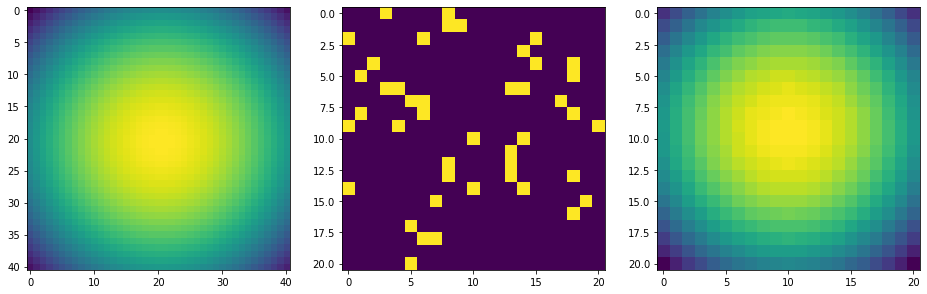

In [18]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(1, 3, 1)# filter
ax2 = fig.add_subplot(1, 3, 2)# distribution
ax3 = fig.add_subplot(1, 3, 3)
ax1.imshow(filter)
ax2.imshow(distribution)
ax3.imshow(intensity)
plt.show()